# Ex1

In [2]:
#a)
dtriangular <- function(x,a,c,b){
  
  if(a>=b){stop("a must be smaller than b")}
  if(a>=c){stop("a must be smaller than c")}
  if(c>=b){stop("c must be smaller than b")}
  if(length(x) >1){
    d <-  NULL
    for(i in 1:length(x)){
      d<- c(d, dtriangular(x[i],a,c,b))
    }
    return(d)
  }else{
    if(x >= a && x < c){ 
      return ((2*(x-a)/((c-a)*(b-a))))
    }else if( x == c){
      return (2 / (b-a))
    }else if( x > c && x<= b){
      return ((2*(b-x)/((b-a)*(b-c))))
    }else{
      return (0)
    }
  }
}


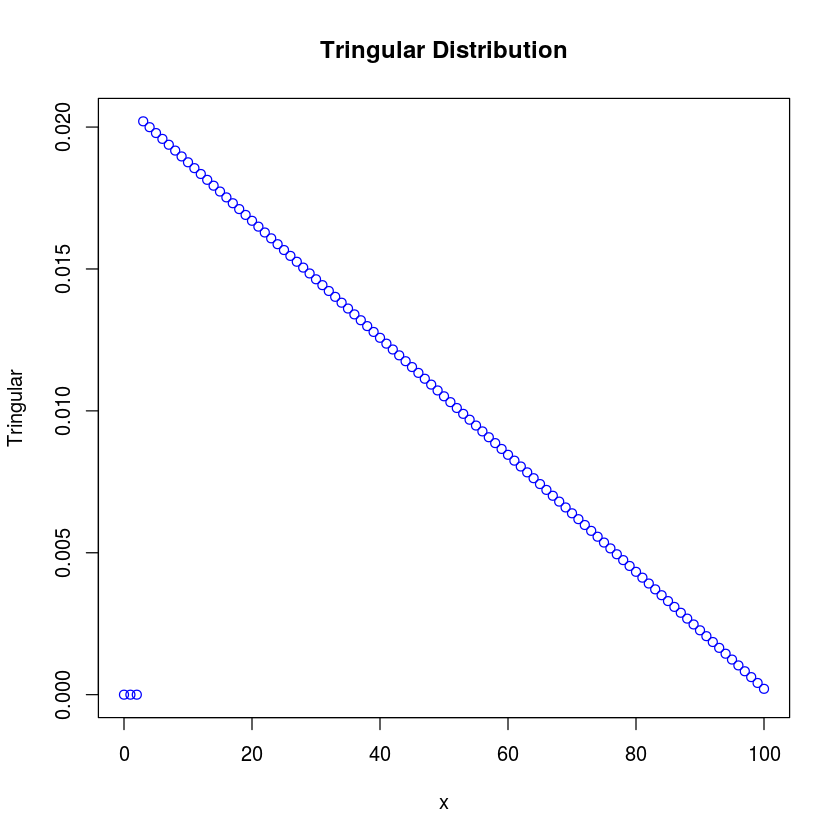

In [24]:
x = seq(0, 100)
y = dtriangular(x,2,3,101)
plot(x,y, main="Tringular Distribution",
ylab="Tringular",
xlab = "x",
col="blue")

\[
    F^-1(u)= 
\begin{cases}
    \ a + \sqrt((b-a)(c-a)u),& \text{if } 0<u<\frac{c-a}{b-a}\\
    b - \sqrt((b-a)(b-c)(1-u)), & \text{if} \frac{c-a}{b-c}<u<1
    \\0,              & \text{otherwise}
\end{cases}
\]



In [33]:
#a)
inv_triangular <- function(u,a,c,b){
#I'm presuming same conditions on a,b,c  
  if(a>=b){stop("a must be smaller than b")}
  if(a>=c){stop("a must be smaller than c")}
  if(c>=b){stop("c must be smaller than b")}
  if(length(u) >1){
    d <-  NULL
    for(i in 1:length(u)){
      d<- c(d, inv_triangular(u[i],a,c,b))
    }
    return(d)
  }else{
    if(u >0 && u < (c-a)/(b-a)){ 
      return (a+sqrt((b-a)*(c-a)*u))
    }else if( u> (c-a)/(b-c) && u <1){
      return (b-sqrt((b-a)*(b-c)*(1-u)))
    }
  }
}


In [57]:
u = runif(10^4, min = 0, max = 1)

In [58]:
y1 = inv_triangular(u,1,1.2,5)

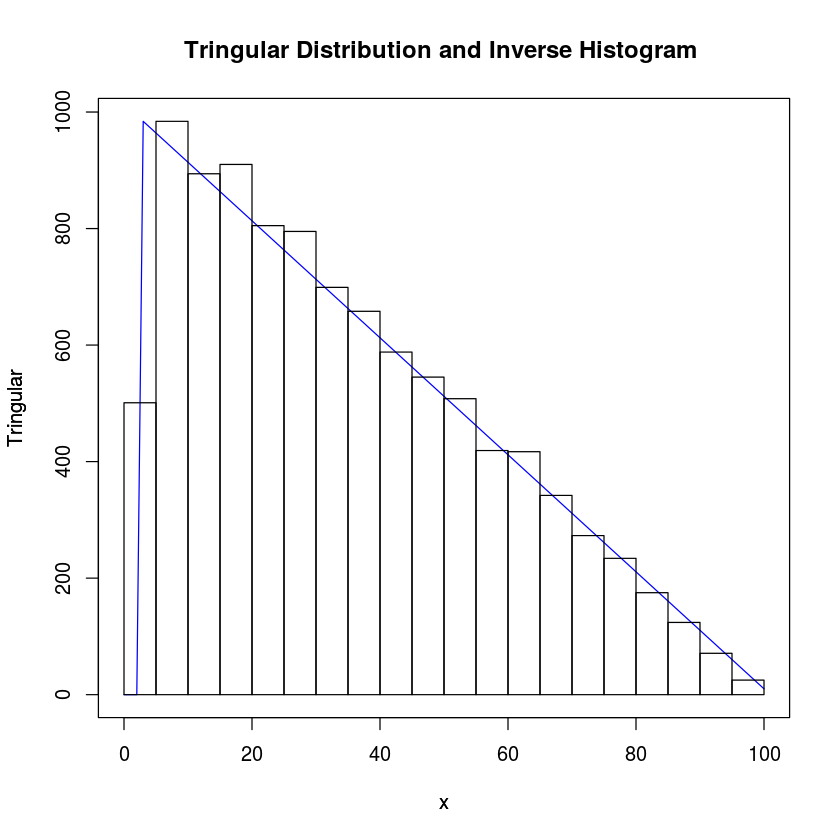

In [63]:
plot(x,y, main="Tringular Distribution and Inverse Histogram ",
ylab="Tringular",
xlab = "x",
type = "l",
col="blue", yaxt='n')
par(new = TRUE)
hist(y1,xlab = "x", ylab="Tringular", main = "", xaxt='n')

# Ex2 

In [64]:
x_1 = c(0.05, 0.19, 0.14,0.17, 0.02, 0.11, 0.06, 0.05, 0.04, 0.17)

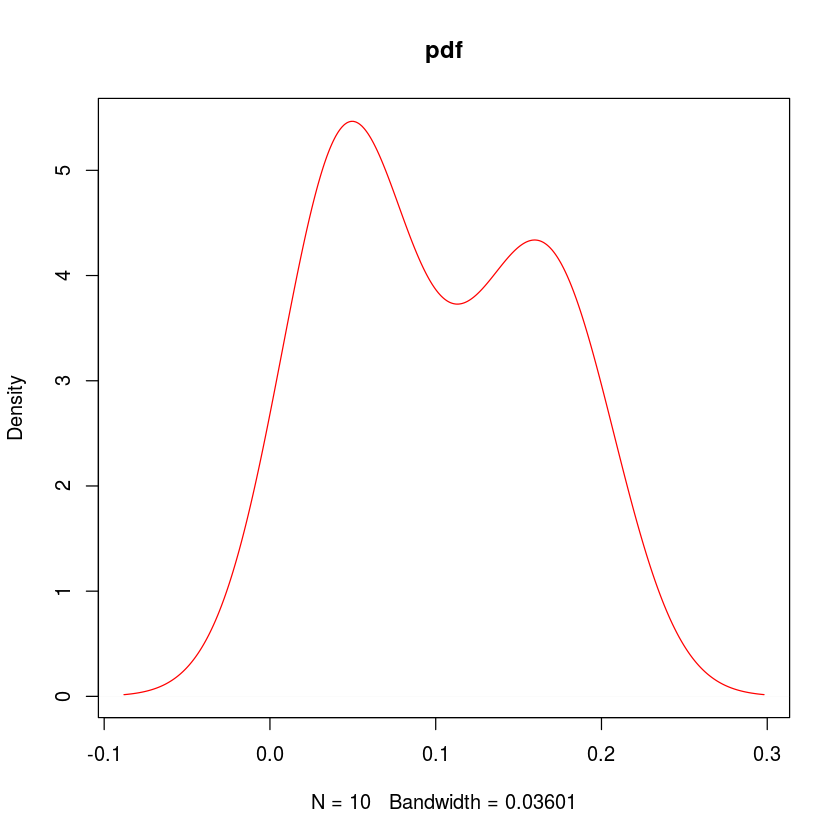

In [125]:
#a) pdf
plot(density(x_1), main= "pdf", type= 'l', col = 'red')

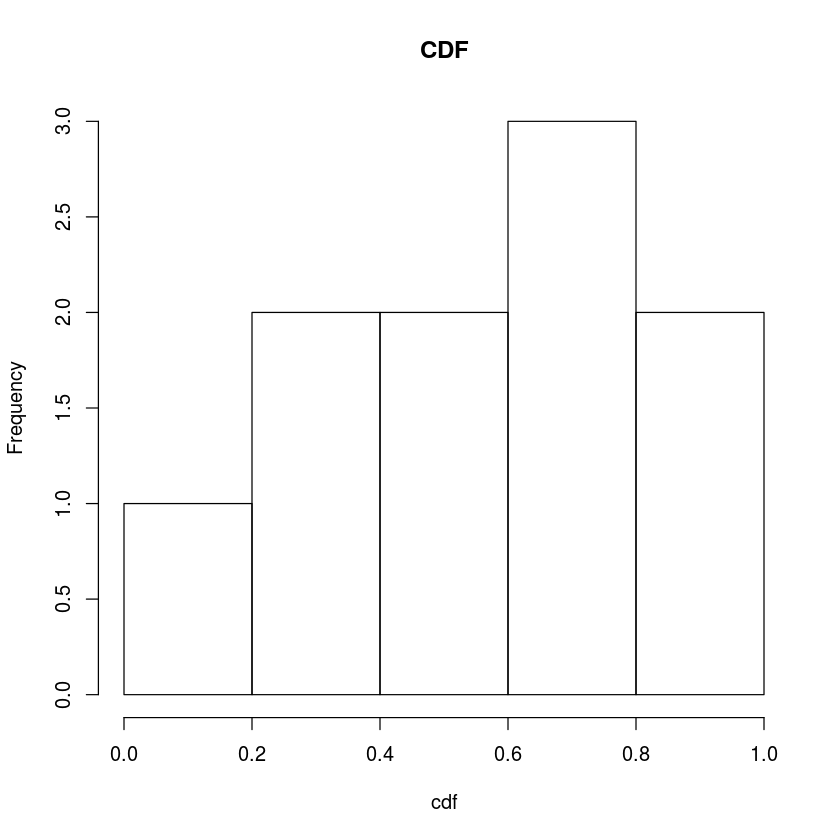

In [127]:
library(dplyr)
cdf = cumsum(x_1)
hist(cdf, main="CDF")

In [128]:
#RNG

In [111]:
discrete.inv.transform.sample <- function( p.vec ) {
  U  <- runif(1)
  if(U <= p.vec[1]){
    return(1)
  }
  for(state in 2:length(p.vec)) {
    if(sum(p.vec[1:(state-1)]) < U && U <= sum(p.vec[1:state]) ) {
      return(state)
    }
  }
}

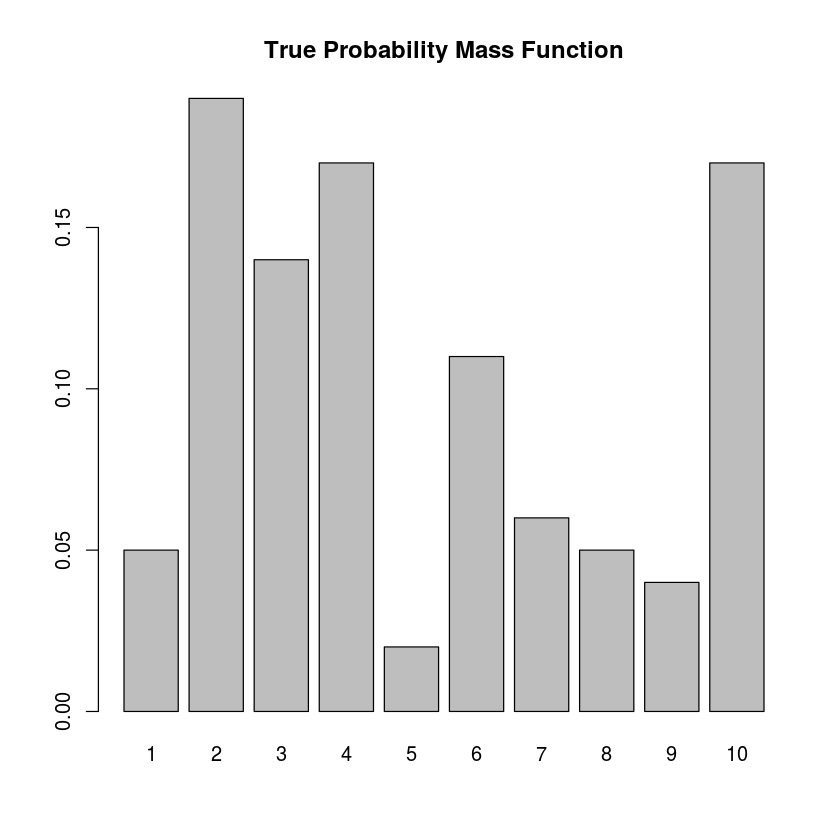

In [116]:
num.samples <- length(x_1)
p.vec        <- x_1
names(p.vec) <- 1:num.samples
samples     <- numeric(num.samples)
for(i in seq_len(num.samples) ) {
  samples[i] <- discrete.inv.transform.sample(p.vec)
}
barplot(p.vec, main='True Probability Mass Function')


In [118]:
samples

[1]  1  4  4  2  2  2  2 10  3  1


Attaching package: ‘dplyr’

The following object is masked from ‘package:sfsmisc’:

    last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



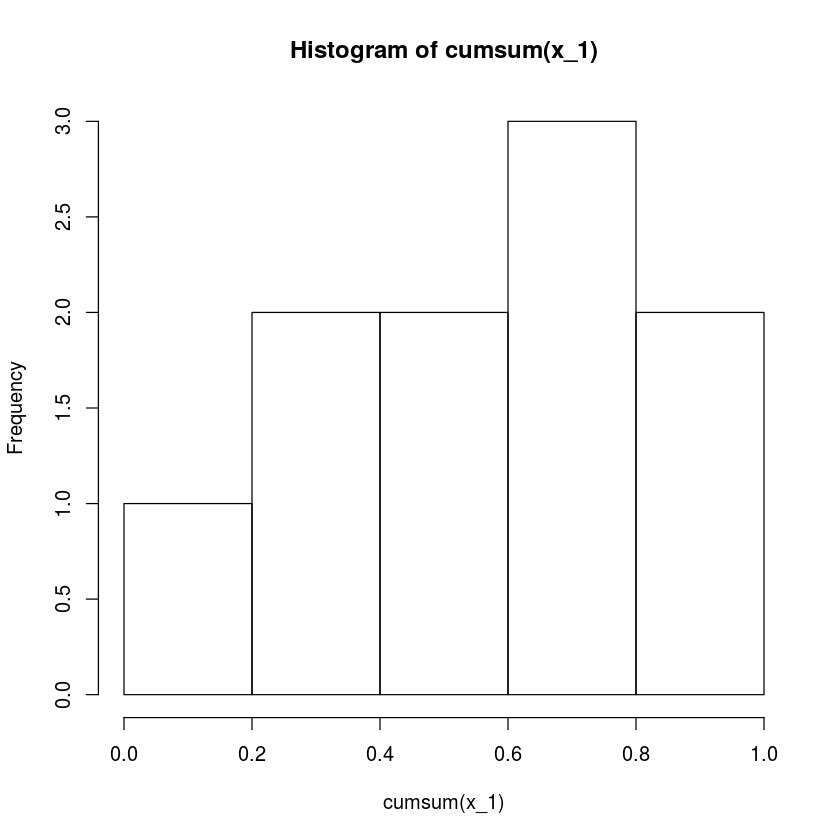

In [122]:
hist(cumsum(x_1))

# EX3

$f(X) = \frac{2}{\pi R^2} \sqrt{R^2-x^2}$

$F_x(X) = \int^{b}_{a} f(X)$

In [209]:
#plt f(X)
R = 20
x = seq(-R,R)
f<-function(R,x){ff = (2/(pi*R^2))*(sqrt(R^2-x^2))
return(ff)}

In [213]:
#g(x) = f(x)/M
g<-function(R,x){gg = (1/(R))*(sqrt(R^2-x^2))
return(gg)}

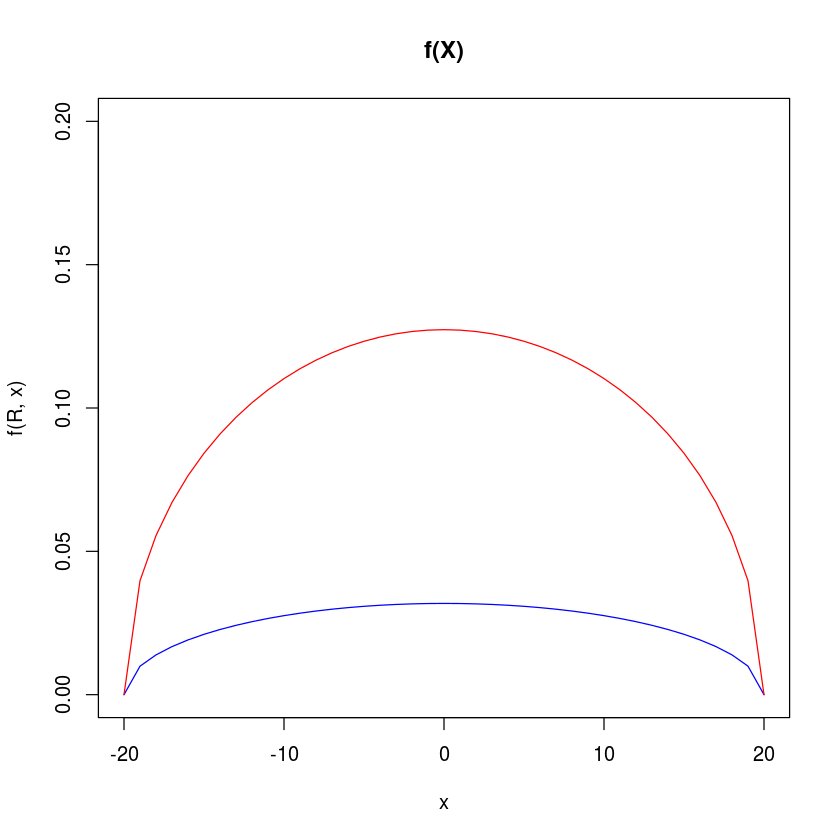

In [215]:
plot(x,f(R,x), type="l", main="f(X)", col='blue', ylim = c(0,0.2))
lines(x,M*g(R,x), main = "g(x))", col='red', ylim = c(0,0.2))

In [201]:
u1 = runif(1)
M = 2/(R*pi)


# EX 4

In [20]:
m = rgamma(1,1)
y = rexp(250, rate = 1/m)
x = sum(y)
u = runif(250, min = 0, max = 1)


# EX 5

In [5]:
library(stringr)

randomgen<- function(x, l) {
  
  y= x^2
    lenx<- floor (log10 (abs (x))) + 1
  leny<- floor (log10 (abs (y))) + 1
  
  d = l*2 - leny
  
  if (x==0) c=0 else {
  if (d > 0 ) {
    #d = lenx*2 - leny
    if (d == l) {  stry<- as.character(y)
                  r<- str_sub(stry, 0, l/2)
                 c<- as.numeric(r, NA.rm = TRUE)
                 }else
                 
                   if (d > l) {  if (floor(log10 (abs (y))) + 1 == 1) {c=0} else {
                     stry<- as.character(y)
                     r<- str_sub(stry, 0, (l/2)-1)
                     c<- as.numeric(r, NA.rm = TRUE)
                                 }
                   }else 
                     {
    i = lenx / 2
    stry<- as.character(y)
    r<- str_sub(stry, i, leny - i)
    c<- as.numeric(r, NA.rm = TRUE)
                 }
                 }
    
  if (d == 0 )  {  
    i = lenx / 2
    stry<- as.character(y)
    r<- str_sub(stry, i+1, leny - i)
    c<- as.numeric(r, NA.rm = TRUE)
  }
  }
  return(c)   
}    

gen <- function(n, seed, l)
  
{
  randoms <- c()
  xi <- seed
  for(i in 1:n)
  {
    xi <- randomgen(xi,l )
    randoms[i] <- xi
  }
  return (c(seed,randoms))
}


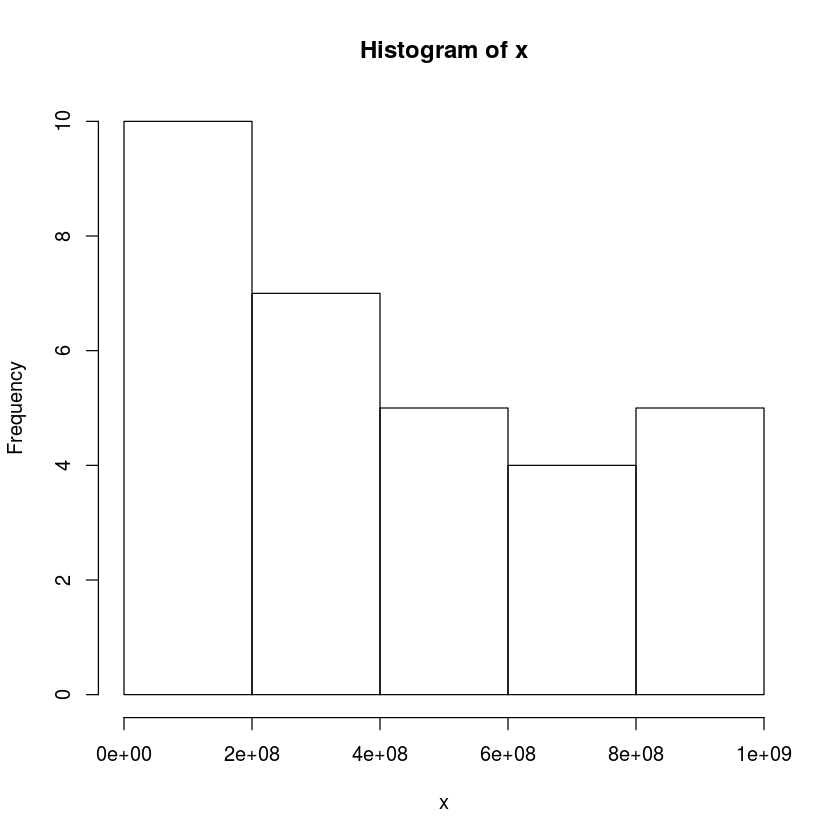

In [9]:
x <- gen(30,304003, 20)
hist(x, axes = TRUE, plot = TRUE, labels = FALSE)
